# Plotting the atmospheric neutrino spectra
Data taken from the most recent atmospheric model calculation http://www.icrr.u-tokyo.ac.jp/~mhonda/

We use the year averaged Gran Sasso (with mountain) and average the Solar minimum/maximum.

In [1]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from NeutrinoFuncs import *
from LabFuncs import *
from PlotFuncs import *
import cmocean

In [2]:
#### Load high energy data (Solar maximum and minimum)
Phi_tot,E_high,cosZ,phi_Az = GetAtmNuFluxes('AtmNu_GranSasso_SolarMin.d',GetIndivSpecies=True)
Phi_min = squeeze(sum(sum(Phi_tot['Total'],0),0))
P1_min = squeeze(sum(sum(Phi_tot['mubar'],0),0))
P2_min = squeeze(sum(sum(Phi_tot['mu'],0),0))
P3_min = squeeze(sum(sum(Phi_tot['e'],0),0))
P4_min = squeeze(sum(sum(Phi_tot['ebar'],0),0))
Phi_tot,_,_,_ = GetAtmNuFluxes('AtmNu_GranSasso_SolarMax.d',GetIndivSpecies=True)
Phi_max = squeeze(sum(sum(Phi_tot['Total'],0),0))
P1_max = squeeze(sum(sum(Phi_tot['mubar'],0),0))
P2_max = squeeze(sum(sum(Phi_tot['mu'],0),0))
P3_max = squeeze(sum(sum(Phi_tot['e'],0),0))
P4_max = squeeze(sum(sum(Phi_tot['ebar'],0),0))

# Take average of Solar min and max
Phi_high = (Phi_min+Phi_max)/2.0
P1 = (P1_max + P1_max)/2.0
P2 = (P2_max + P2_max)/2.0
P3 = (P3_max + P3_max)/2.0
P4 = (P4_max + P4_max)/2.0

#### Load low energy data
dat1 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_mubar.txt',delimiter=',')
dat2 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_mu.txt',delimiter=',')
dat3 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_e.txt',delimiter=',')
dat4 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_ebar.txt',delimiter=',')
E_low = dat1[:,0]


#### Modulated data (I've checked this and it modulation is too small to see)
# Phi_tot,_,_,_ = GetAtmNuFluxes('modulated/AtmNu_GranSasso_SolarMax_0305.d')
# PhiMod1 = squeeze(sum(sum(Phi_tot,0),0))
# Phi_tot,_,_,_ = GetAtmNuFluxes('modulated/AtmNu_GranSasso_SolarMax_0608.d')
# PhiMod2 = squeeze(sum(sum(Phi_tot,0),0))
# Phi_tot,_,_,_ = GetAtmNuFluxes('modulated/AtmNu_GranSasso_SolarMax_0911.d')
# PhiMod3 = squeeze(sum(sum(Phi_tot,0),0))
# Phi_tot,_,_,_ = GetAtmNuFluxes('modulated/AtmNu_GranSasso_SolarMax_1202.d')
# PhiMod4 = squeeze(sum(sum(Phi_tot,0),0))


10.700908102011468


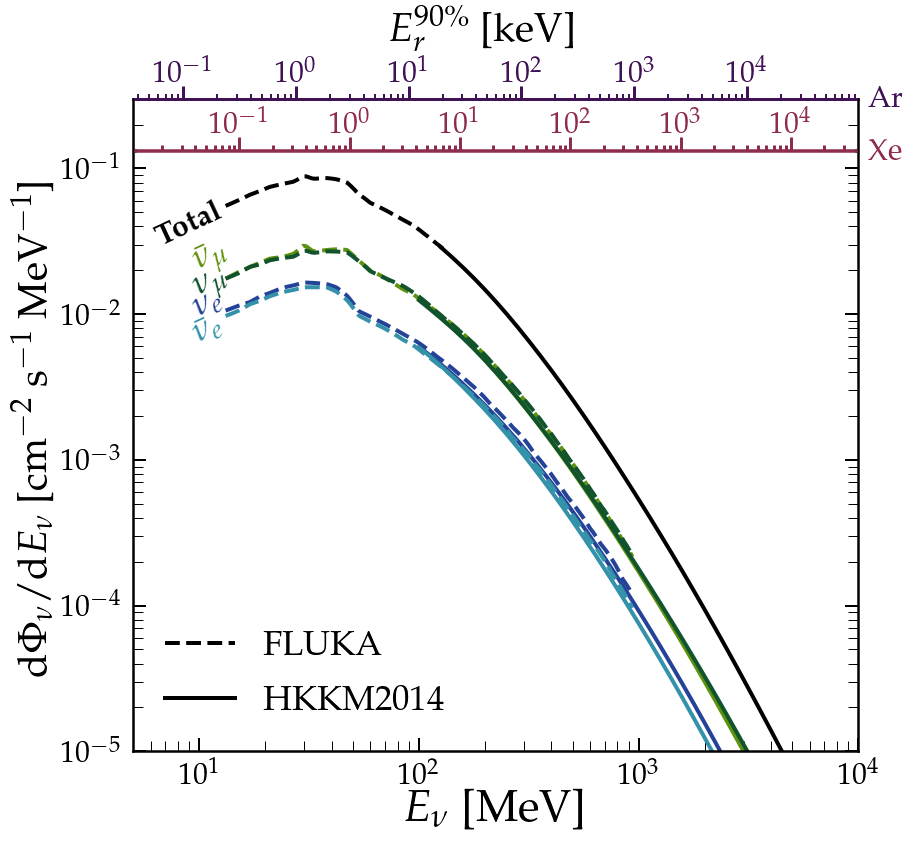

In [3]:
fig,ax = MySquarePlot(r'$E_\nu$ [MeV]',r'',tfs=30)

col_g = cmocean.cm.delta(array([0.1,0.25,0.75,0.9]))

col_e = col_g[0,:]
col_ebar = col_g[1,:]
col_mu = col_g[3,:]
col_mubar = col_g[2,:]

ax.loglog(E_high,P1,'-',color=col_mubar,lw=4)
ax.plot(E_low[0:-50],dat1[0:-50,1],'--',color=col_mubar,lw=4)

ax.loglog(E_high,P2,'-',color=col_mu,lw=4)
ax.plot(E_low[0:-50],dat2[0:-50,1],'--',color=col_mu,lw=4)

ax.loglog(E_high,P3,'-',color=col_e,lw=4)
ax.plot(E_low[0:-50],dat3[0:-50,1],'--',color=col_e,lw=4)

ax.loglog(E_high,P4,'-',color=col_ebar,lw=4)
ax.plot(E_low[0:-50],dat4[0:-50,1],'--',color=col_ebar,lw=4)


Phi_high = P1+P2+P3+P4
Phi_low = dat1[:,1]+dat2[:,1]+dat3[:,1]+dat4[:,1]

ax.loglog(E_low[0:120],Phi_low[0:120],'k--',lw=4,label='FLUKA')
ax.loglog(E_high[2:],Phi_high[2:]*1.035,'k-',lw=4,label='HKKM2014')
plt.legend(frameon=False,fontsize=35,loc=3)

#plt.loglog(E_high,PhiMod1,'-',lw=3,color='gray')
#plt.loglog(E_high,PhiMod2,'-',lw=3,color='gray')
#plt.loglog(E_high,PhiMod3,'-',lw=3,color='gray')
#plt.loglog(E_high,PhiMod4,'-',lw=3,color='gray')

plt.gcf().text(0.185,0.595,r'$\bar{\nu}_e$',color=col_ebar,fontsize=35,rotation=25)
plt.gcf().text(0.185,0.625,r'$\nu_e$',color=col_e,fontsize=35,rotation=25)
plt.gcf().text(0.185,0.65,r'$\nu_\mu$',color=col_mu,fontsize=35,rotation=25)
plt.gcf().text(0.185,0.68,r'$\bar{\nu}_\mu$',color=col_mubar,fontsize=35,rotation=25)

plt.gcf().text(0.145,0.71,r'{\bf Total}',color='k',fontsize=30,rotation=25)
xlims = array([5,1e4])
plt.ylim([1e-5,3e-1])
plt.xlim(xlims)

plt.ylabel(r'|',fontsize=50,color='w')
plt.gcf().text(0.03,0.5,r'$\textrm{d}\Phi_\nu/\textrm{d}E_\nu$ [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]',color='w',fontsize=40,horizontalalignment='center',rotation_mode="anchor",rotation=90)
plt.gcf().text(0.04,0.5,r'$\textrm{d}\Phi_\nu/\textrm{d}E_\nu$ [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]',fontsize=40,horizontalalignment='center',rotation_mode="anchor",rotation=90)


# m_N = (Xe131.MassNumber)*m_p_keV
# E_r_max = 0.05*2*m_N*(1000.0*xlims)**2.0/(m_N+1000*xlims)**2.0
# E_r_90 = E_r_max*(1 - 0.9/2)
# ax2 = ax.twiny()
# ax2.set_xscale('log')
# ax2.set_xlim(E_r_90)
# ax2.set_xlabel(r'|',fontsize=60,color='w')
# ax2.tick_params(which='major',direction='out',width=2,length=13,right=True,top=True,pad=-5)
# ax2.tick_params(which='minor',direction='out',width=1,length=10,right=True,top=True)


ax.tick_params(which='major',top=False,pad=12)
ax.tick_params(which='minor',top=False)

cols = cm.twilight(linspace(0,1,10))
col_Ar = cols[4,:]
col_Xe =  cols[6,:]

m_N = (Ar40.MassNumber)*m_p_keV
E_r_max = 0.05*2*m_N*(1000.0*xlims)**2.0/(m_N+1000*xlims)**2.0
E_r_90 = E_r_max*(1 - 0.9/2)
ax2 = fig.add_axes([0.1275, 0.88, 0.77, 0.0000001])
ax2.set_yticks([])
ax2.set_xscale('log')
ax2.xaxis.tick_top()
ax2.set_xlim(E_r_90)
ax2.spines['bottom'].set_color(col_Ar)
ax2.spines['top'].set_color(col_Ar)
ax2.xaxis.label.set_color(col_Ar)
ax2.tick_params(axis='x', colors=col_Ar)
ax2.tick_params(which='major',direction='out',width=3,length=13,bottom=False,top=True,pad=-5)
ax2.tick_params(which='minor',direction='out',width=2,length=5,bottom=False,top=True)
ax2.tick_params(which='both', colors=col_Ar)

plt.gcf().text(0.5,0.96,r"$E^{\rm 90\%}_r$ [keV]",color='w',fontsize=40,verticalalignment='center',horizontalalignment='center')
plt.gcf().text(0.5,0.95,r"$E^{\rm 90\%}_r$ [keV]",fontsize=40,verticalalignment='center',horizontalalignment='center')

m_N = (Xe131.MassNumber)*m_p_keV
E_r_max = 0.05*2*m_N*(1000.0*xlims)**2.0/(m_N+1000*xlims)**2.0
E_r_90 = E_r_max*(1 - 0.9/2)
ax2 = fig.add_axes([0.1275, 0.88-0.06, 0.77, 0.001])
ax2.set_yticks([])
ax2.set_xscale('log')
ax2.xaxis.tick_top()
ax2.set_xlim(E_r_90)
ax2.spines['bottom'].set_color(col_Xe)
ax2.spines['top'].set_color(col_Xe)
ax2.xaxis.label.set_color(col_Xe)
ax2.tick_params(axis='x', colors=col_Xe)
ax2.tick_params(which='major',direction='out',width=3,length=13,bottom=False,top=True,pad=-5)
ax2.tick_params(which='minor',direction='out',width=3,length=5,bottom=False,top=True)
ax2.tick_params(which='both', colors=col_Xe)

plt.gcf().text(0.91,0.81,'Xe',fontsize=30,color=col_Xe)
plt.gcf().text(0.91,0.87,'Ar',fontsize=30,color=col_Ar)






# Save joined flux
###### Join the two
E_join = append(E_low[0:120],E_high[2:])
Phi_join = append(Phi_low[0:120],Phi_high[2:]*1.035)

##### Interpolate to create new array
nfine = 1000
E_nu_max = 1.0e4
E_fine = logspace(log10(E_join[0]),log10(E_nu_max),nfine)
Phi_fine = interp(E_fine,E_join,Phi_join)

Fnorm = trapz(Phi_fine,E_fine)
print(Fnorm)
savetxt(nufile_dir+'Atm-1000.txt',vstack((E_fine,Phi_fine/Fnorm)).T,delimiter=',') # Use Reactor for likelihood analysis so save it here


plt.show()
MySaveFig(fig,"AtmosphericNuFlux")
